In [78]:
from rdkit import Chem
from rdkit.Chem import Draw

In [79]:
zinc_smi = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=NC2C=CC(C(=O)NCC3=CC=CC(OCCCC4=CN(C5=CC(OC)=C(OC)C=C5C(O)=O)N=N4)=C3)=NC1=2'))

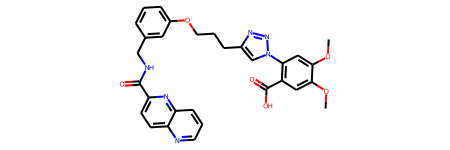

In [80]:
zinc = Chem.MolFromSmiles(zinc_smi)
#Chem.Kekulize(zinc,clearAromaticFlags=True)
zinc

In [81]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(zinc, bitInfo=rdkbi)

In [82]:
tpls = [(zinc,x,rdkbi) for x in rdkbi]
frags = [x for x in tpls if not None]
Draw.DrawRDKitBits(tpls[:10],molsPerRow=4,legends=[str(x) for x in rdkbi][:10], useSVG = True)

[16:19:11] Can't kekulize mol.  Unkekulized atoms: 2 4 5


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 2 4 5

In [83]:
def atom_map_num(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

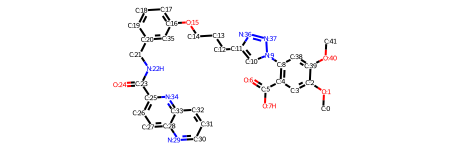

In [84]:
mol_with_atom_index(zinc)

In [77]:
zinc.GetAtomWithIdx(29).GetAtomicNum()

7